## Cada linha possui um projeto diferente de site web, como o site de uma escola, de uma padaria e assim por diante. As pessoas interessadas em criar sites para seus respectivos negócios submetem o projeto a uma empresa e estipulam o número de horas para que o projeto seja criado (expected_hours) , bem como a quantia a ser paga (price).
## A coluna unfinished mostra os projetos que foram finalizados (0) e os que não foram finalizados (1) - ou seja, se algum web designer pegou tal projeto, concordando com o prazo e o valor estipulados.


In [1]:
import pandas as pd

In [2]:
uri = 'https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv'

df = pd.read_csv(uri)
df.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [3]:
renomear ={
    'expected_hours' : 'horas_esperadas',
    'price':'preco',
    'unfinished':'nao_finalizado'
}

df = df.rename(columns = renomear )
df.head()

,nao_finalizado,horas_esperadas,preco
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [4]:
# Para o nao_finalizado gerar confusões será criado uma nova coluna e trocado o 1 e 0.
troca = { 0 : 1, 1 : 0}  # Oque é 0 vai ser 1 e oq é 1 vai ser 0

df['finalizado'] = df.nao_finalizado.map(troca)
df.head()

,nao_finalizado,horas_esperadas,preco,finalizado
0,1,26,192,0
1,1,88,9015,0
2,1,89,2577,0
3,1,42,275,0
4,1,39,170,0


In [5]:
df.tail()

,nao_finalizado,horas_esperadas,preco,finalizado
2152,0,80,7518,1
2153,1,52,1332,0
2154,0,40,473,1
2155,0,75,5324,1
2156,1,37,377,0


## Criar visualização com duas features (horas_esperadas e preco) - E Com base na coluna Finalizado

In [6]:
import seaborn as sns

<AxesSubplot:xlabel='horas_esperadas', ylabel='preco'>

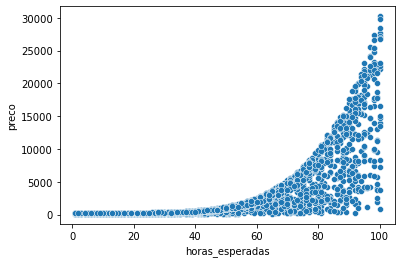

In [7]:
sns.scatterplot(x = 'horas_esperadas', y = 'preco', data = df)

<AxesSubplot:xlabel='horas_esperadas', ylabel='preco'>

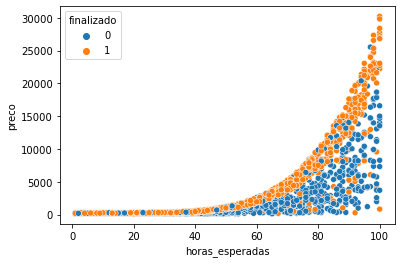

In [8]:
sns.scatterplot(x = 'horas_esperadas', y = 'preco', hue = 'finalizado',data = df)


Text(0.5, 1.0, 'Horas x Preço')

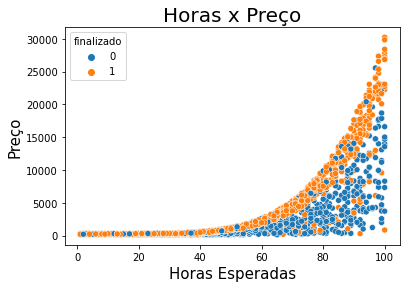

In [24]:
graf = sns.scatterplot(x = 'horas_esperadas', y = 'preco', hue = 'finalizado',data = df)
graf.set_xlabel('Horas Esperadas', fontsize=15)
graf.set_ylabel('Preço', fontsize=15)
graf.set_title('Horas x Preço', fontsize=20)

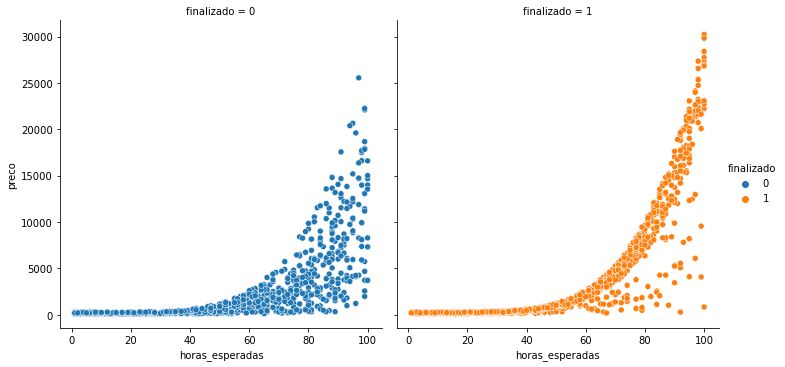

In [9]:
# Usando um plot relativo
sns.relplot(x = 'horas_esperadas', y = 'preco', hue = 'finalizado',col = 'finalizado',data = df)
# Separa em dois gráficos os trabalhos finalizados e não finalizados

In [10]:
x = df[['horas_esperadas', 'preco']]
y = df[['finalizado']]

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

In [12]:
SEED = 20 # Definir a ordem dos numeros aleatorios que o split utiliza

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y,stratify=y,random_state = SEED, 
test_size = 0.25) # Estratificar os dados proporcionalmente com a coluna y

In [13]:
modelo = LinearSVC(random_state = SEED)  # Necessario utilizar o seed aqui também pois para não gerar acuraria aleatoria.
modelo.fit(treino_x, treino_y)

previsoes = modelo.predict(teste_x)


C:\Users\ferda\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\ferda\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [14]:
acuracia = accuracy_score(teste_y, previsoes) * 100


print(f'Treinaremos com {len(treino_x)} elementos e testaremos com {len(teste_x)} elementos')
print(f'A acuracia foi de % .2f%%' % acuracia)

Treinaremos com 1617 elementos e testaremos com 540 elementos
A acuracia foi de  47.41%


### Será realizado um recurso comparativo para saber se a acuracia é uma valor satisfatório.
### Baseline é um recurso(no caso nesse teste) onde temos todos os dados como sim, e queremos que o resultado da acuracia seja o minimo como um resultado do baseline tem que ser

In [15]:
import numpy as np
previsoes_de_base = np.ones(540) # criar 540 1

acuracia = accuracy_score(teste_y, previsoes_de_base) * 100
print('A acurácia do algoritmo de baseline foi de  % .2f%%' % acuracia) 

A acurácia do algoritmo de baseline foi de   52.59%
